# Importing libraries :

In [1]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.sql.window import Window
from pyspark.sql import functions as func


color = sns.color_palette()
%matplotlib inline

# spark Configuration

In [2]:
conf = SparkConf().setAppName("Task_1_Data_Preprocessing").setMaster("local")
sc = SparkContext(conf=conf)
spark = SparkSession(sc)

# Data Loading using PySpark Sql Module

In [3]:
bus_breakdown_and_delay = spark.read.format("csv").load("data_file/Bus_Breakdown_and_Delays.csv",
                                                        header=True,
                                                        inferSchema=True,
                                                        sep=","
                                                        )


# Detail Description of data.

In [4]:
bus_breakdown_and_delay.printSchema()

root
 |-- School_Year: string (nullable = true)
 |-- Busbreakdown_ID: integer (nullable = true)
 |-- Run_Type: string (nullable = true)
 |-- Bus_No: string (nullable = true)
 |-- Route_Number: string (nullable = true)
 |-- Reason: string (nullable = true)
 |-- Schools_Serviced: string (nullable = true)
 |-- Occurred_On: string (nullable = true)
 |-- Created_On: string (nullable = true)
 |-- Boro: string (nullable = true)
 |-- Bus_Company_Name: string (nullable = true)
 |-- How_Long_Delayed: string (nullable = true)
 |-- Number_Of_Students_On_The_Bus: integer (nullable = true)
 |-- Has_Contractor_Notified_Schools: string (nullable = true)
 |-- Has_Contractor_Notified_Parents: string (nullable = true)
 |-- Have_You_Alerted_OPT: string (nullable = true)
 |-- Informed_On: string (nullable = true)
 |-- Incident_Number: string (nullable = true)
 |-- Last_Updated_On: string (nullable = true)
 |-- Breakdown_or_Running_Late: string (nullable = true)
 |-- School_Age_or_PreK: string (nullable = t

# Steps of Data analysis using PySpark
Step 1 : EDA

    EDA : Exploratory Data Analysis 
    
        1. Defination : Exploratory Data Analysis refers to the critical process of performing initial 
                        investigations on data so as to discover patterns,to spot anomalies,to test hypothesis
                        and to check assumptions with the help of summary statistics and graphical 
                        representations.

# Get all distinct values in columns.

In [5]:
distinct_in_school_year = bus_breakdown_and_delay.select("School_Year").distinct()
print("All Distinct Values of School Year : \n", distinct_in_school_year.toPandas())

All Distinct Values of School Year : 
   School_Year
0   2016-2017
1   2017-2018
2   2019-2020
3   2015-2016


In [6]:
distinct_busbreakdown_ids = bus_breakdown_and_delay.select("Busbreakdown_ID").distinct()
#print("All Distinct Values of Bus BreakDown id : \n", distinct_busbreakdown_ids.toPandas())

In [7]:
distinct_run_type = bus_breakdown_and_delay.select("Run_Type").distinct()
print("All Distinct Values of Run Type : \n", distinct_run_type.toPandas())

All Distinct Values of Run Type : 
                    Run_Type
0     General Ed Field Trip
1         Special Ed AM Run
2         General Ed AM Run
3                      None
4         General Ed PM Run
5     Special Ed Field Trip
6       Project Read PM Run
7         Special Ed PM Run
8       Project Read AM Run
9                  Pre-K/EI
10  Project Read Field Trip


In [8]:
distinct_bus_number = bus_breakdown_and_delay.select("Bus_No").distinct().toPandas()
print("All Distinct busses : \n", distinct_bus_number)

All Distinct busses : 
       Bus_No
0       1436
1       2294
2      5589D
3       4032
4        829
...      ...
10760  52127
10761   2717
10762  10505
10763  42269
10764  2337V

[10765 rows x 1 columns]


In [9]:
distinct_route_number = bus_breakdown_and_delay.select("Route_Number").distinct().toPandas()
print("All Distinct Route Number : \n", distinct_route_number)

All Distinct Route Number : 
       Route_Number
0             M238
1            X2001
2             M576
3             Q309
4            R1090
...            ...
11279        M9143
11280        X9170
11281         X451
11282         HK 6
11283        K9098

[11284 rows x 1 columns]


In [10]:
distinct_reason = bus_breakdown_and_delay.select("Reason").distinct().toPandas()
print("All Distinct reasons for late : \n", distinct_reason)

All Distinct reasons for late : 
                         Reason
0                  Problem Run
1           Weather Conditions
2                        Other
3                    Flat Tire
4           Mechanical Problem
5            Delayed by School
6  Late return from Field Trip
7                  Won`t Start
8                     Accident
9                Heavy Traffic


In [11]:
distinct_boro = bus_breakdown_and_delay.select("Boro").distinct().toPandas()
print("All Distinct Boro : \n", distinct_boro)

All Distinct Boro : 
                Boro
0            Queens
1     Nassau County
2              None
3       Connecticut
4          Brooklyn
5      All Boroughs
6     Staten Island
7       Westchester
8        New Jersey
9   Rockland County
10        Manhattan
11            Bronx


In [12]:
distinct_bus_company = bus_breakdown_and_delay.select("Bus_Company_Name").distinct().toPandas()
print("All Distinct Bus Company Names : \n", distinct_bus_company)

All Distinct Bus Company Names : 
                  Bus_Company_Name
0                     SNT BUS INC
1       TWENTY FIRST AV TRANSP (B
2        MUTUAL BUS CORP. (B2321)
3          DON THOMAS BUSES, INC.
4                          ADDIES
..                            ...
86      PIONEER TRANSPORTATION CO
87                   G.V.C., LTD.
88  HAPPY CHILD TRANS LLC (B2192)
89    PIONEER TRANSPORTATION CORP
90       LITTLE LISA BUS CO. INC.

[91 rows x 1 columns]


In [13]:
distinct_breakdown_or_late = bus_breakdown_and_delay.select("Breakdown_or_Running_Late").distinct().toPandas()
print("All Distinct Breakdown_or_Running_Late : \n", distinct_breakdown_or_late)

All Distinct Breakdown_or_Running_Late : 
   Breakdown_or_Running_Late
0              Running Late
1                 Breakdown


In [14]:
distinct_school_age_or_prek = bus_breakdown_and_delay.select("School_Age_or_PreK").distinct().toPandas()
print("All Distinct School_Age_or_PreK : \n", distinct_school_age_or_prek)

All Distinct School_Age_or_PreK : 
   School_Age_or_PreK
0         School-Age
1              Pre-K


In [15]:
# Use Window Function to find the relation between the Bus Company name and Delay .
windowSpecRank = Window().partitionBy(["Bus_Company_Name"]).orderBy(func.desc("How_Long_Delayed"))
relation_with_two_columns_window_module = bus_breakdown_and_delay.withColumn("rank", func.rank().over(windowSpecRank))
distinct_relation_rank = relation_with_two_columns_window_module.select("Bus_Company_Name").distinct().toPandas()
print("All Bus Company are arrange in rank with related to Delayed : \n", distinct_relation_rank)

All Bus Company are arrange in rank with related to Delayed : 
                  Bus_Company_Name
0                     SNT BUS INC
1       TWENTY FIRST AV TRANSP (B
2        MUTUAL BUS CORP. (B2321)
3          DON THOMAS BUSES, INC.
4                          ADDIES
..                            ...
86      PIONEER TRANSPORTATION CO
87                   G.V.C., LTD.
88  HAPPY CHILD TRANS LLC (B2192)
89    PIONEER TRANSPORTATION CORP
90       LITTLE LISA BUS CO. INC.

[91 rows x 1 columns]


In [16]:
# Use Window Function to find the relation between the Route Number and the Reasons .
windowSpecRank = Window().partitionBy(["Route_Number"]).orderBy(func.desc("Reason"))
relation_with_two_columns_window_module = bus_breakdown_and_delay.withColumn("rank", func.rank().over(windowSpecRank))
distinct_relation_rank = relation_with_two_columns_window_module.select("Route_Number").distinct().toPandas()
print("All Routes on which bus have most delay with some reason : \n", distinct_relation_rank)

All Routes on which bus have most delay with some reason : 
       Route_Number
0             M238
1            X2001
2             M576
3             Q309
4            R1090
...            ...
11279        M9143
11280        X9170
11281         X451
11282         HK 6
11283        K9098

[11284 rows x 1 columns]


# Plot all graphs in between all columns

In [17]:
bus_breakdown_and_delay = bus_breakdown_and_delay.toPandas()

/home/kanik/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


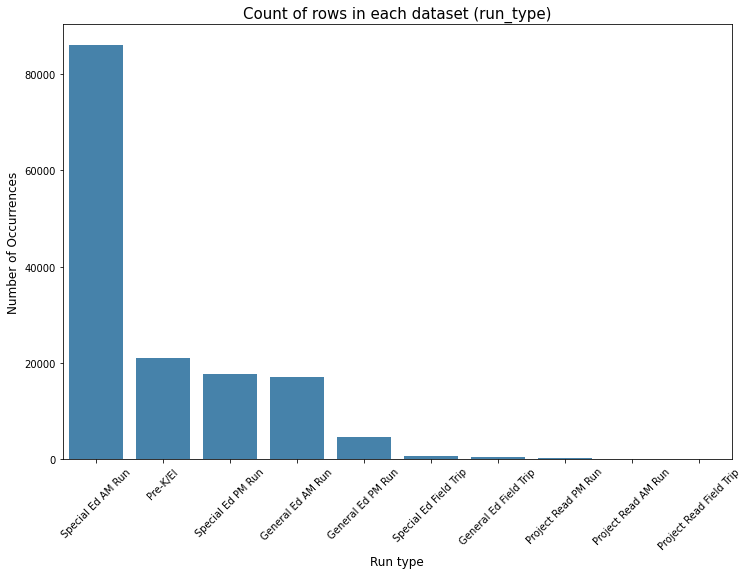

In [18]:
run_type = bus_breakdown_and_delay.Run_Type.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(run_type.index, run_type.values, alpha=0.9, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Run type', fontsize=12)
plt.title('Count of rows in each dataset (run_type)', fontsize=15)
plt.xticks(rotation='45')
plt.show()

/home/kanik/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


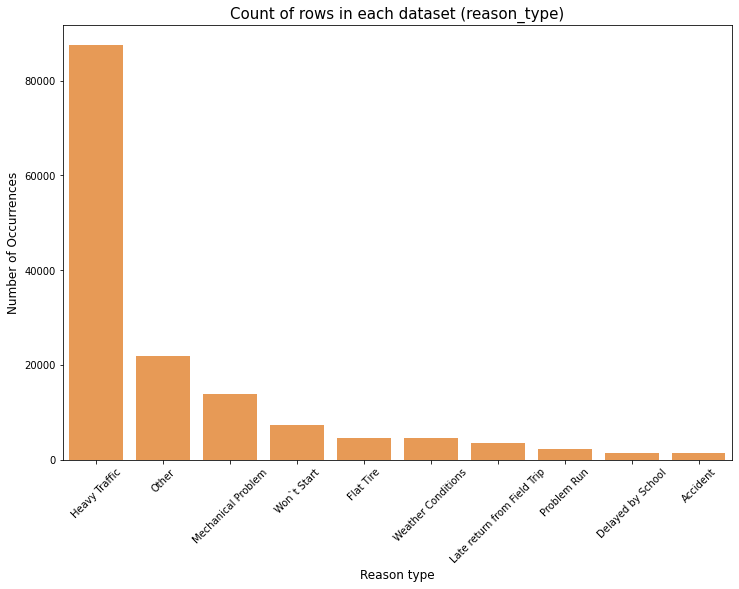

In [19]:
reason = bus_breakdown_and_delay.Reason.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(reason.index, reason.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Reason type', fontsize=12)
plt.title('Count of rows in each dataset (reason_type)', fontsize=15)
plt.xticks(rotation='45')
plt.show()

/home/kanik/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


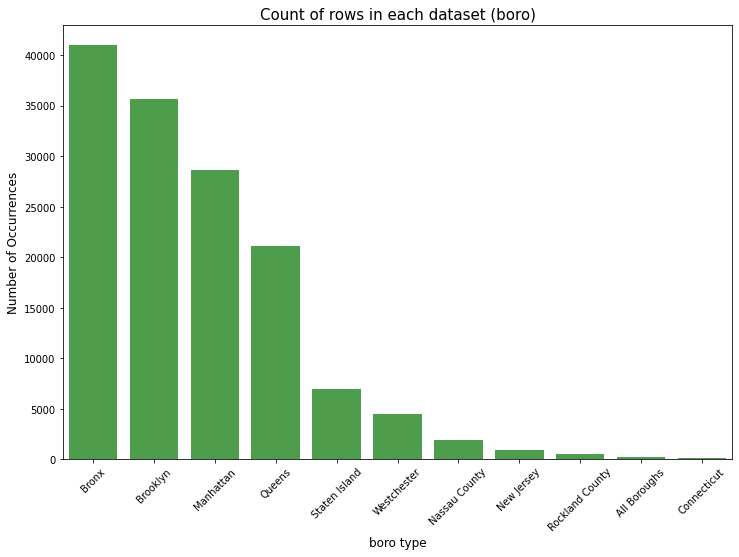

In [20]:
boro = bus_breakdown_and_delay.Boro.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(boro.index, boro.values, alpha=0.9, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('boro type', fontsize=12)
plt.title('Count of rows in each dataset (boro)', fontsize=15)
plt.xticks(rotation='45')
plt.show()

/home/kanik/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


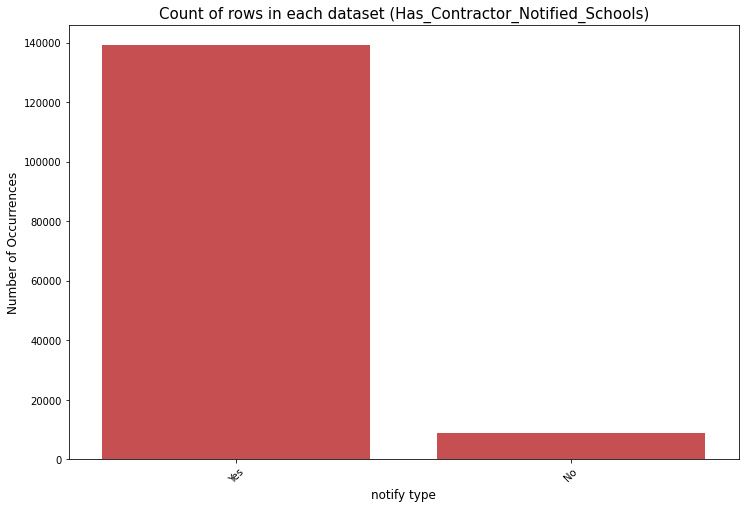

In [21]:
notify1 = bus_breakdown_and_delay.Has_Contractor_Notified_Schools.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(notify1.index, notify1.values, alpha=0.9, color=color[3])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('notify type', fontsize=12)
plt.title('Count of rows in each dataset (Has_Contractor_Notified_Schools)', fontsize=15)
plt.xticks(rotation='45')
plt.show()

/home/kanik/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


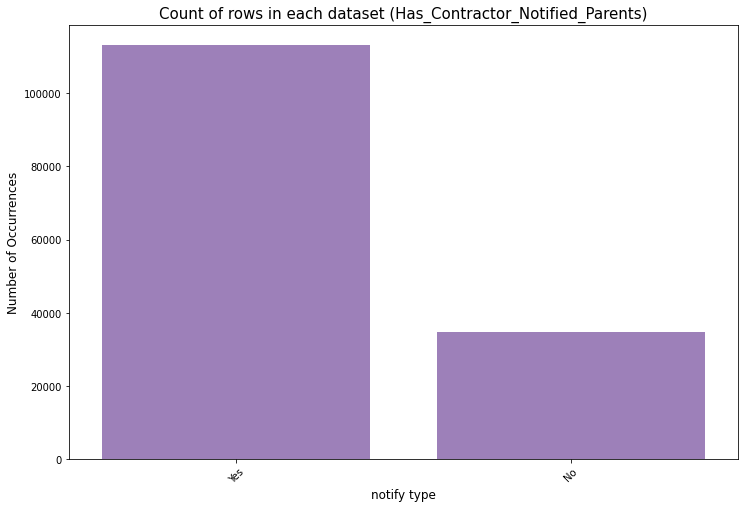

In [22]:
notify2 = bus_breakdown_and_delay.Has_Contractor_Notified_Parents.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(notify2.index, notify2.values, alpha=0.9, color=color[4])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('notify type', fontsize=12)
plt.title('Count of rows in each dataset (Has_Contractor_Notified_Parents)', fontsize=15)
plt.xticks(rotation='45')
plt.show()

/home/kanik/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


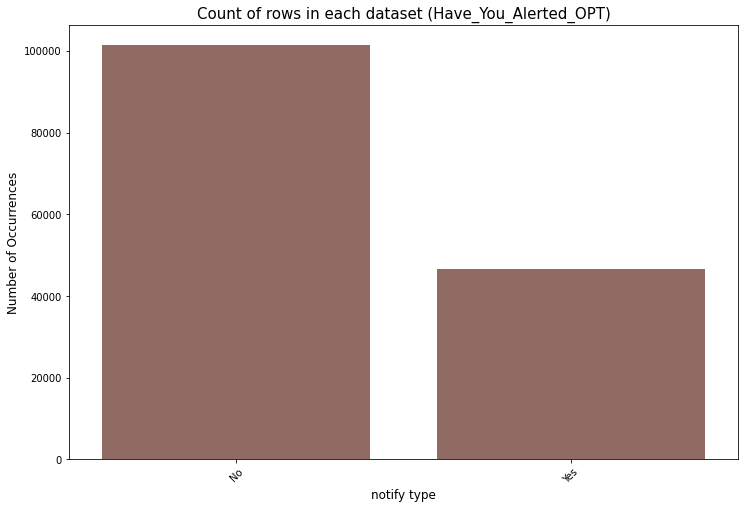

In [23]:
notify3 = bus_breakdown_and_delay.Have_You_Alerted_OPT.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(notify3.index, notify3.values, alpha=0.9, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('notify type', fontsize=12)
plt.title('Count of rows in each dataset (Have_You_Alerted_OPT)', fontsize=15)
plt.xticks(rotation='45')
plt.show()

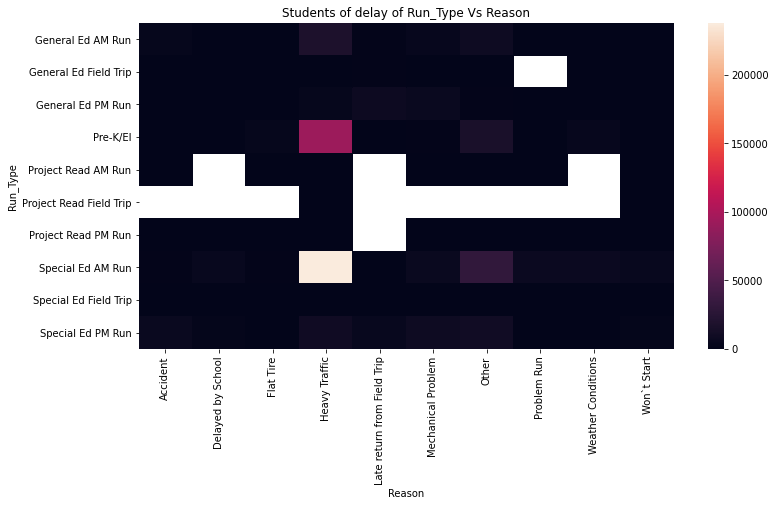

In [24]:
grouped_df = bus_breakdown_and_delay.groupby(["Run_Type", "Reason"])["Number_Of_Students_On_The_Bus"].aggregate(np.sum).reset_index()
grouped_df = grouped_df.pivot('Run_Type', 'Reason', 'Number_Of_Students_On_The_Bus')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Students of delay of Run_Type Vs Reason")
plt.show()

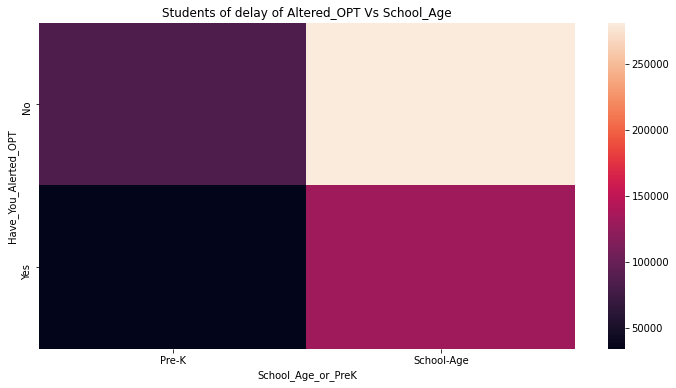

In [25]:
grouped_df = bus_breakdown_and_delay.groupby(["Have_You_Alerted_OPT", "School_Age_or_PreK"])["Number_Of_Students_On_The_Bus"].aggregate(np.sum).reset_index()
grouped_df = grouped_df.pivot('Have_You_Alerted_OPT', 'School_Age_or_PreK', 'Number_Of_Students_On_The_Bus')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Students of delay of Altered_OPT Vs School_Age")
plt.show()

          Reason             Boro  Number_Of_Students_On_The_Bus
0       Accident            Bronx                           1082
1       Accident         Brooklyn                           7844
2       Accident      Connecticut                              0
3       Accident        Manhattan                            857
4       Accident    Nassau County                             25
..           ...              ...                            ...
96   Won`t Start       New Jersey                              4
97   Won`t Start           Queens                           3165
98   Won`t Start  Rockland County                              1
99   Won`t Start    Staten Island                            138
100  Won`t Start      Westchester                             19

[101 rows x 3 columns]


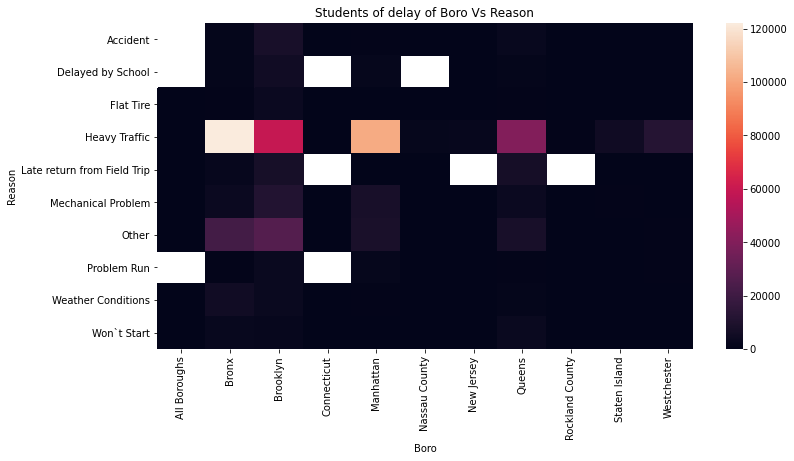

In [26]:
grouped_df = bus_breakdown_and_delay.groupby(["Reason", "Boro"])["Number_Of_Students_On_The_Bus"].aggregate(np.sum).reset_index()
print(grouped_df)
grouped_df = grouped_df.pivot('Reason', 'Boro', 'Number_Of_Students_On_The_Bus')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Students of delay of Boro Vs Reason")
plt.show()

/home/kanik/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


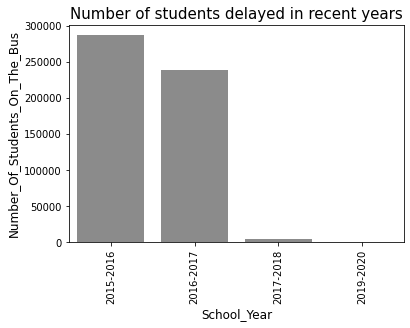

In [27]:
grouped_df = bus_breakdown_and_delay.groupby('School_Year')["Number_Of_Students_On_The_Bus"].aggregate(np.sum).reset_index()
sns.barplot(grouped_df.School_Year, grouped_df.Number_Of_Students_On_The_Bus, alpha=0.9, color=color[7])
plt.ylabel('Number_Of_Students_On_The_Bus', fontsize=12)
plt.xlabel('School_Year', fontsize=12)
plt.title('Number of students delayed in recent years', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [28]:
# Task 1 Find the Route Number on which the reason == Heavy Trafic occur most

reason_heavy_trafic = bus_breakdown_and_delay[bus_breakdown_and_delay["Reason"] == "Heavy Traffic"]
reason_heavy_trafic_1 = reason_heavy_trafic["Reason"].replace({"Heavy Traffic" : 1})
reason_heavy_trafic["Reason"] = reason_heavy_trafic_1
grouped_df = reason_heavy_trafic.groupby("Route_Number")["Reason"].aggregate(np.sum).reset_index()
answer = grouped_df[grouped_df["Reason"] == np.max(grouped_df["Reason"])]
answer

/home/kanik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Route_Number,Reason
36,1,1981


In [29]:
grouped_df = grouped_df.pivot('Route_Number', 'Reason')
plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Students of delay of Altered_OPT Vs School_Age")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 864x432 with 0 Axes>